In [1902]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import datetime

In [1903]:
headers = {
    'Content-Type': 'application/json'
}

In [1904]:
requestResponse = requests.get('https://api.tiingo.com/tiingo/daily/nvda/prices?startDate=2012-1-1&token=3ab68f4b54224a51847d25a4dc930dfa87b55e2a', headers=headers)

api_data = requestResponse.json()
stock_df = pd.DataFrame(api_data)
raw_df = stock_df.copy()
NVDA_raw_csv = '/Users/jocksolo/PycharmProjects/trading_advisor/data'
stock_df['date'] = pd.to_datetime(stock_df['date'], errors='coerce')
stock_df['date'] = stock_df['date'].dt.date

In [1905]:
index_response = requests.get('https://api.tiingo.com/tiingo/daily/qqq/prices?startDate=2012-1-1&token=3ab68f4b54224a51847d25a4dc930dfa87b55e2a', headers=headers)

qqq_data = index_response.json()
qqq_df = pd.DataFrame(qqq_data)
qqq_df['date'] = pd.to_datetime(qqq_df['date'], errors='coerce')
qqq_df['date'] = qqq_df['date'].dt.date


In [1906]:
volatility_data = requests.get("https://api.tiingo.com/tiingo/daily/vxx/prices?startDate=2012-1-1&token=3ab68f4b54224a51847d25a4dc930dfa87b55e2a", headers=headers)

vxx_data = volatility_data.json()
vxx_df = pd.DataFrame(vxx_data)
vxx_df['date'] = pd.to_datetime(vxx_df['date'], errors='coerce')
vxx_df['date'] = vxx_df['date'].dt.date

In [1907]:
stock_df['vxx_adj_close'] = vxx_df['adjClose']
stock_df['index_adj_close'] = qqq_df['adjClose']

In [1908]:
# Implementing my own RSI calculation
delta = stock_df['adjClose'].diff(1)
delta.dropna(inplace=True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 14

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + relative_strength))

combined = pd.DataFrame()
combined['adjClose'] = stock_df['adjClose']
combined['RSI'] = RSI
stock_df['RSI'] = RSI
stock_df.dropna(subset=['RSI'], inplace=True)

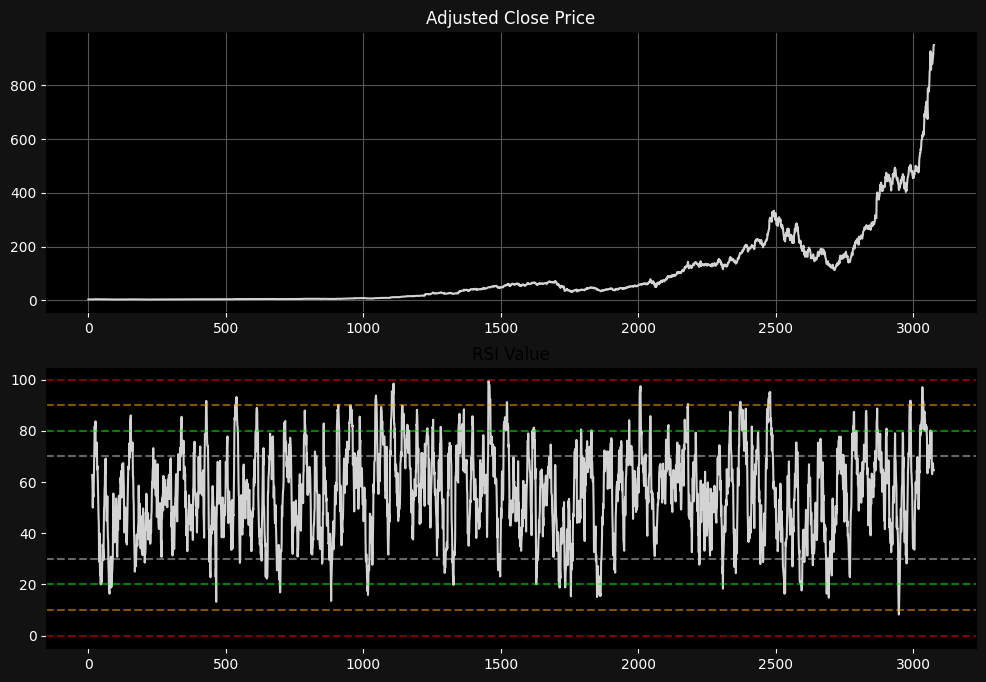

In [1909]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['adjClose'], color='lightgray')
ax1.set_title('Adjusted Close Price', color='white')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.axhline(0, linestyle='--',alpha=0.5, color='#ff0000')
ax2.axhline(10, linestyle='--',alpha=0.5, color='#ffaa00')
ax2.axhline(20, linestyle='--',alpha=0.5, color='#00ff00')
ax2.axhline(30, linestyle='--',alpha=0.5, color='#cccccc')
ax2.axhline(70, linestyle='--',alpha=0.5, color='#cccccc')
ax2.axhline(80, linestyle='--',alpha=0.5, color='#00ff00')
ax2.axhline(90, linestyle='--',alpha=0.5, color='#ffaa00')
ax2.axhline(100, linestyle='--',alpha=0.5, color='#ff0000')

ax2.set_title('RSI Value')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

In [1855]:
stock_df.drop(['divCash', 'splitFactor'], axis=1, inplace=True)

In [1856]:
stock_df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,vxx_adj_close,index_adj_close,RSI
14,2012-01-24,14.94,15.0000,14.5000,14.51,18273000,3.426604,3.440366,3.325687,3.327981,73092000,113950.72,53.263540,62.711864
15,2012-01-25,14.85,14.8900,14.1200,14.54,31853800,3.405962,3.415137,3.238531,3.334861,127415200,109158.40,53.932904,59.365994
16,2012-01-26,14.71,15.2400,14.6300,15.07,19991800,3.373852,3.495412,3.355504,3.456421,79967200,109117.44,53.745482,50.000000
17,2012-01-27,14.91,14.9900,14.5000,14.62,11249900,3.419724,3.438072,3.325687,3.353210,44999600,106782.72,53.906129,55.910543
18,2012-01-30,14.80,14.8700,14.4300,14.65,9976900,3.394494,3.410549,3.309632,3.360091,39907600,110018.56,53.950753,54.012346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2024-03-19,893.98,905.4400,850.1000,867.00,67217127,893.980000,905.440000,850.100000,867.000000,67217127,13.47,438.570000,67.425848
3072,2024-03-20,903.72,904.1000,882.2300,897.97,47906279,903.720000,904.100000,882.230000,897.970000,47906279,13.19,443.770000,66.959962
3073,2024-03-21,914.35,926.4800,904.0500,923.00,48037231,914.350000,926.480000,904.050000,923.000000,48037231,13.07,445.870000,64.725073
3074,2024-03-22,942.89,947.7799,908.3401,911.41,58671936,942.890000,947.779900,908.340100,911.410000,58671936,13.13,446.380000,64.606884


In [1857]:
# Selecting features
feature_list = ['adjClose', 'close', 'high', 'low', 'open', 'volume', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'index_adj_close', 'vxx_adj_close', 'RSI']
features_df = stock_df[feature_list]

In [1858]:
corr_matrix = features_df.corr()

In [1859]:
corr_matrix

,adjClose,close,high,low,open,volume,adjHigh,adjLow,adjOpen,adjVolume,index_adj_close,vxx_adj_close,RSI
adjClose,1.000000,0.744121,0.744713,0.742440,0.743084,0.685802,0.999775,0.999822,0.999561,0.087397,0.858065,-0.284956,0.114793
close,0.744121,1.000000,0.999730,0.999773,0.999449,0.337651,0.743409,0.744642,0.743933,0.099914,0.827965,-0.392729,0.154415
high,0.744713,0.999730,1.000000,0.999692,0.999783,0.342588,0.744420,0.745384,0.744991,0.105505,0.828733,-0.392986,0.150315
low,0.742440,0.999773,0.999692,1.000000,0.999727,0.332695,0.741879,0.743298,0.742636,0.094609,0.826876,-0.392606,0.154019
open,0.743084,0.999449,0.999783,0.999727,1.000000,0.337584,0.742838,0.743989,0.743725,0.100431,0.827553,-0.392740,0.149721
volume,0.685802,0.337651,0.342588,0.332695,0.337584,1.000000,0.690130,0.682286,0.686314,0.497783,0.654523,-0.197372,-0.014330
adjHigh,0.999775,0.743409,0.744420,0.741879,0.742838,0.690130,1.000000,0.999761,0.999836,0.090910,0.858326,-0.285067,0.112051
adjLow,0.999822,0.744642,0.745384,0.743298,0.743989,0.682286,0.999761,1.000000,0.999793,0.084315,0.858101,-0.285088,0.114344
adjOpen,0.999561,0.743933,0.744991,0.742636,0.743725,0.686314,0.999836,0.999793,1.000000,0.087837,0.858210,-0.285095,0.111556
adjVolume,0.087397,0.099914,0.105505,0.094609,0.100431,0.497783,0.090910,0.084315,0.087837,1.000000,0.073938,-0.011099,0.003248


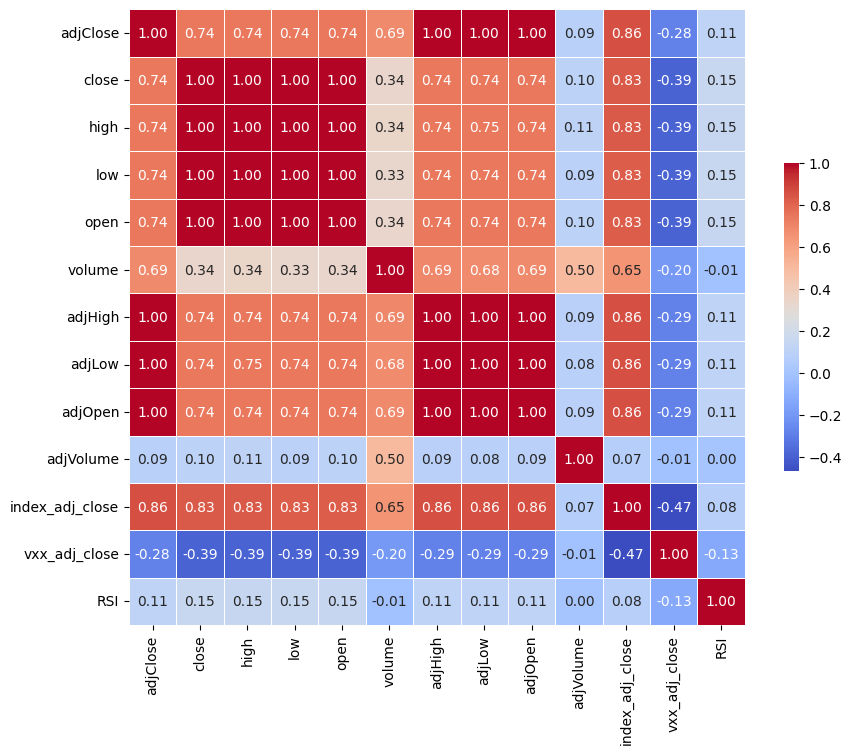

In [1860]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [1861]:
# Scaling features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features_df)

In [1862]:
window_size = 60
prediction_days = 10

# historical_data = []
# target = []
# 
# for i in range(window_size, len(features_df) - prediction_days):
#     historical_data.append(scaled_features[i-window_size:i])
#     target.append(scaled_features[i:i+prediction_days, features_df.columns.get_loc('adjClose')])  # Assuming you want to predict 'adjClose'
# 
# historical_data, target = np.array(historical_data), np.array(target)
# target = np.reshape(target, (target.shape[0], target.shape[1]))  # Reshape y_train if necessary

# Splitting datasets
# x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(historical_data, target, test_size=0.2, shuffle=False)

In [1863]:
# not_model = Sequential([
#     Input(shape=(window_size, len(feature_list))),  # Explicitly define the input shape
#     LSTM(units=50,return_sequences=True),
#     Dropout(0.2),
#     LSTM(units=50, return_sequences=False),
#     Dropout(0.2),
#     Dense(units=prediction_days)
# ])

In [1864]:
# Compile the model
# not_model.compile(optimizer='adam', loss='mean_squared_error')

In [1865]:
# Training the model (Adjust epochs and batch_size according to your dataset)
# not_model.fit(x_train_set, y_train_set, epochs=50, batch_size=32)

In [1866]:
# # Evaluate model performance
# train_loss = not_model.evaluate(x_train_set, y_train_set, verbose=0)
# test_loss = not_model.evaluate(x_test_set, y_test_set, verbose=0)
# print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

In [1867]:
# # Predicting the last 60 days from the test set
# predicted = not_model.predict(x_test_set[-1].reshape(1, window_size, len(feature_list)))
# 
# print(predicted)

In [1868]:
# # Initialize a dummy array with zeros
# dummy_array = np.zeros((predicted.shape[1], len(feature_list)))
# 
# # Insert the predictions into the first column of each row of the dummy array
# for i in range(predicted.shape[1]):  # Iterate over each of the 10 predictions
#     dummy_array[i, 0] = predicted[0, i]  # Assign each prediction to the 'adjClose' column
#     
# # Inverse transform the entire dummy array
# predicted_prices_full = scaler.inverse_transform(dummy_array)
# 
# # Extract the inversely transformed predictions for 'adjClose'
# predicted_prices = predicted_prices_full[:, 0]
# 
# predicted_prices

In [1869]:
# # Testing the accuracy by splitting it into different time frames
# stock_df['date'] = pd.to_datetime(stock_df['date'])
# stock_df.sort_values('date', inplace=True)
# 
# # Choosing a split date for demonstration (adjust as needed)
# split_date = pd.Timestamp('2023-01-01')
# 
# # Splitting the dataset into training and testing based on the split date
# train_df = stock_df[stock_df['date'] < split_date]
# test_df = stock_df[stock_df['date'] >= split_date]
# 
# # Fit the scaler on the training data only, then transform both train and test sets
# scaler.fit(train_df[feature_list])
# scaled_train = scaler.transform(train_df[feature_list])
# scaled_test = scaler.transform(test_df[feature_list])

In [1870]:
def create_sequences(data, window_size, prediction_days):
    x, y = [], []
    for i in range(window_size, len(data) - prediction_days):
        x.append(data[i-window_size:i])
        y.append(data[i:i+prediction_days, 0])  # Predicting 'adjClose'
    return np.array(x), np.array(y)
# 
# x_train, y_train = create_sequences(scaled_train, window_size, prediction_days)
# x_test, y_test = create_sequences(scaled_test, window_size, prediction_days)

In [1871]:
# test_model = Sequential([
#     Input(shape=(window_size, len(feature_list))),
#     LSTM(units=50, return_sequences=True),
#     Dropout(0.2),
#     LSTM(units=50),
#     Dropout(0.2),
#     Dense(units=prediction_days)
# ])
# 
# test_model.compile(optimizer='adam', loss='mean_squared_error')
# test_model.fit(x_train, y_train, epochs=25, batch_size=16)

In [1872]:
# Make predictions
# predictions = test_model.predict(x_test)

In [1873]:
# # Initialize a dummy array with zeros
# dummy_array_2 = np.zeros((predictions.shape[1], len(feature_list)))
# 
# # Insert the predictions into the first column of each row of the dummy array
# for i in range(predictions.shape[1]):  # Iterate over each of the 10 predictions
#     dummy_array_2[i, 0] = predictions[0, i]  # Assign each prediction to the 'adjClose' column
#     
# # Inverse transform the entire dummy array
# predictions_prices_full = scaler.inverse_transform(dummy_array_2)
# 
# # Extract the inversely transformed predictions for 'adjClose'
# predicted_prices_test = predictions_prices_full[:, 0]
# 
# predicted_prices_test

In [1874]:
stock_df.set_index('date', inplace=True)
target = 'adjClose'
new_scaled_data = scaler.fit_transform(stock_df)

In [1875]:
# x, y = create_sequences(new_scaled_data, window_size, prediction_days)

In [1876]:
# from sklearn.model_selection import TimeSeriesSplit
# 
# # TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, test_index in tscv.split(x):
#     x_train_2, x_test_2 = x[train_index], x[test_index]
#     y_train_2, y_test_2 = y[train_index], y[test_index]
#     
#     # Define LSTM Model
#     test_model_2 = Sequential([
#         Input(shape=(window_size, len(feature_list))),
#         LSTM(50, return_sequences=True),
#         Dropout(0.2),
#         LSTM(50, return_sequences=False),
#         Dropout(0.2),
#         Dense(prediction_days)  # Predicting 'prediction_days' into the future
#     ])
#     
#     test_model_2.compile(optimizer='adam', loss='mean_squared_error')
#     
#     # Train the model
#     test_model_2.fit(x_train_2, y_train_2, epochs=25, batch_size=16)
#     
#     # Evaluate the model
#     test_loss = test_model_2.evaluate(x_test_2, y_test_2)
#     print(f'Test Loss: {test_loss}')
#     
#     # Make predictions (Optional: inverse transform and compare against actual values)
#     predictions = test_model_2.predict(x_test_2)
#     # Assuming you want to inverse transform the last set of predictions for visualization or comparison
#     if test_index[-1] == x.shape[0] - 1:  # Check if it's the last split
#         # Prepare predictions for inverse transform
#         predictions_full = np.zeros((predictions.shape[0], new_scaled_data.shape[1]))
#         predictions_full[:, 0] = predictions[:, -1]  # Assuming we're only interested in the last prediction day
#         predicted_prices = scaler.inverse_transform(predictions_full)[:, 0]
#         print(predicted_prices)

In [1877]:
# # Assuming stock_df is your DataFrame and it's indexed by date
# last_date = stock_df.index.max()
# 
# # Generate future dates starting from the day after the last date
# future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(predicted_prices), freq='D')
# 
# # Visualization
# plt.figure(figsize=(14, 7))
# 
# # Plot historical adjClose prices
# plt.plot(stock_df.index, stock_df['adjClose'], label='Historical adjClose')
# 
# # Plot predicted prices
# plt.plot(future_dates, predicted_prices, label='Predicted adjClose', linestyle='--', color='red')
# 
# plt.title('Stock Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.xticks(rotation=45)  # Rotate dates for better readability
# plt.tight_layout()  # Adjust layout to make room for the rotated date labels
# 
# plt.show()


In [1878]:
# num_features = new_scaled_data.shape[1]  # Number of features in your scaled data
# 
# # Calculate the starting index for the sequences leading up to the last 10 days
# start_index = len(new_scaled_data) - 10 - window_size
# 
# # Initialize x_test to an empty list
# x_test = []
# 
# # Create sequences for x_test
# for i in range(10):  # We want 10 sequences leading up to the final 10 days
#     end_index = start_index + window_size + i
#     x_test.append(new_scaled_data[end_index - window_size:end_index])
# 
# # Convert x_test to a numpy array and ensure its shape is (10, window_size, num_features)
# x_test = np.array(x_test)
# 
# print(f"x_test shape: {x_test.shape}")
# # Expected shape: (10, window_size, num_features)


In [1879]:
# # Calculate the index to split the data so the last 10 days are reserved for testing
# test_size = 10  # days
# train_test_split_index = len(stock_df) - test_size
#     
# # Split your data into training and testing sets
# train_df = stock_df.iloc[:train_test_split_index]
# test_df = stock_df.iloc[train_test_split_index - window_size:]  # Include window_size days prior to test for input sequence
#     
# scaled_train = scaler.fit_transform(train_df)
# scaled_test = scaler.transform(test_df)

In [1880]:
# # Prepare sequences for LSTM
# def create_sequences_with_target(data, window_size, prediction_days, include_target=True):
#     x, y = [], []
#     for i in range(window_size, len(data)):
#         x.append(data[i-window_size:i])
#         if include_target:
#             # Assumes 'adjClose' is the first column after scaling
#             y.append(data[i:(i + prediction_days if i + prediction_days < len(data) else len(data)), 0])
#     return np.array(x), np.array(y) if include_target else np.array(x)

In [1881]:
# prediction_days = 1  # Assuming 1 day prediction for simplicity; adjust as needed

In [1882]:
# # Creating training sequences
# x_train, y_train = create_sequences_with_target(scaled_train, window_size, prediction_days)
# 
# # For testing, we'll only need the input sequences, excluding the last 10 days for target
# x_test, _ = create_sequences_with_target(scaled_test, window_size, prediction_days, include_target=False)

In [1883]:
# # Define LSTM Model
# model = Sequential([
#     Input(shape=(window_size, len(feature_list))),
#     LSTM(50, return_sequences=True),
#     Dropout(0.2),
#     LSTM(50, return_sequences=False),
#     Dropout(0.2),
#     Dense(prediction_days)
# ])

In [1884]:
# model.compile(optimizer='adam', loss='mean_squared_error')

In [1885]:
# model.fit(x_train, y_train, epochs=25, batch_size=16)

In [1886]:
# # Make predictions for the last 10 days
# predictions = model.predict(x_test)
# 
# # Prepare predictions for inverse scaling
# # Assuming 'adjClose' is the first column in your scaled data
# predictions_full = np.zeros((len(predictions), new_scaled_data.shape[1]))
# predictions_full[:, 0] = predictions[:, -1]  # Assuming you are predicting one day ahead and want the last prediction
# 
# # Inverse transform the predictions to the original scale
# predicted_prices = scaler.inverse_transform(predictions_full)[:, 0]
# 
# # Extract the actual prices for the last 10 days
# actual_prices = stock_df['adjClose'][-10:].values


In [1887]:
# # Visualizing the predicted vs actual prices
# plt.figure(figsize=(10, 6))
# dates = stock_df.index[-10:]  # Extract dates for the last 10 days
# plt.plot(dates, actual_prices, label='Actual Prices', marker='o', color='blue')
# plt.plot(dates, predicted_prices, label='Predicted Prices', marker='x', linestyle='--', color='red')
# plt.title('Comparison of Actual and Predicted Prices for the Last 10 Days')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [1888]:
# predicted_prices

In [1889]:
# # Assuming 'stock_df' has a datetime index
# last_10_dates = stock_df.index[-10:]
# 
# predicted_prices_df = pd.DataFrame({
#     'Date': last_10_dates,
#     'PredictedPrices': predicted_prices
# })
# 
# print(predicted_prices_df)

In [1890]:
# # Using the 'last_10_dates' extracted above and assuming 'actual_prices' and 'predicted_prices' are available
# plt.figure(figsize=(10, 6))
# plt.plot(last_10_dates, actual_prices, label='Actual Prices', marker='o', color='blue')
# plt.plot(last_10_dates, predicted_prices, label='Predicted Prices', marker='x', linestyle='--', color='red')
# plt.title('Comparison of Actual and Predicted Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.xticks(rotation=45)  # Rotate date labels for better readability
# plt.legend()
# plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
# plt.show()

In [1891]:
# # Calculate daily changes for actual and predicted prices
# actual_changes = np.diff(actual_prices.flatten())
# predicted_changes = np.diff(predicted_prices.flatten())


In [1892]:
# # Compare signs of the daily changes to see if they match (both positive or both negative)
# direction_matches = np.sign(actual_changes) == np.sign(predicted_changes)
# 
# # Calculate the ratio or percentage of matches
# directional_accuracy = np.mean(direction_matches) * 100
# 
# print(f"Directional accuracy: {directional_accuracy:.2f}%")

In [1893]:
feature_list

['adjClose',
 'close',
 'high',
 'low',
 'open',
 'volume',
 'adjHigh',
 'adjLow',
 'adjOpen',
 'adjVolume',
 'index_adj_close',
 'vxx_adj_close',
 'RSI']

In [1910]:
from tensorflow.keras.optimizers import Adam

scaled_data = scaler.fit_transform(features_df[feature_list].values)
scaled_feature_list = scaler.fit_transform(features_df)
scaled_target_data = scaler.fit_transform(stock_df['adjClose'].values.reshape(-1,1))

# Splitting data into training and "testing" where testing data is actually the data to predict the next 10 days
x_train = []
y_train = []

for i in range(window_size, len(scaled_data) - prediction_days):
    x_train.append(scaled_data[i - window_size:i])
    y_train.append(scaled_data[i:i + prediction_days, features_df.columns.get_loc('adjClose')])

x_train, y_train = np.array(x_train), np.array(y_train)
x_to_predict = scaled_data[-(window_size + prediction_days):-prediction_days].reshape(1, window_size, len(feature_list))


In [1919]:
feature_list

['adjClose',
 'close',
 'high',
 'low',
 'open',
 'volume',
 'adjHigh',
 'adjLow',
 'adjOpen',
 'adjVolume',
 'index_adj_close',
 'vxx_adj_close',
 'RSI']

In [1920]:
# Defining the LSTM Model
prediction_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, len(feature_list))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)  # Predicting 'prediction_days' into the future
])

# Compile the model
prediction_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
prediction_model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=1)

# Make predictions for the next 10 days
predicted_prices = prediction_model.predict(x_to_predict)

ValueError: Unrecognized keyword arguments passed to LSTM: {'batch_shape': (None, 60, 13)}

In [1912]:
predicted_prices

array([[0.9714041]], dtype=float32)

In [1913]:
# Initialize a dummy array with zeros
dummy_array_3 = np.zeros((predicted_prices.shape[1], len(feature_list)))

# Insert the predictions into the first column of each row of the dummy array
for i in range(predicted_prices.shape[1]):  # Iterate over each of the 10 predictions
    dummy_array_3[i, 0] = predicted_prices[0, i]  # Assign each prediction to the 'adjClose' column
    
# Inverse transform the entire dummy array
predictions_prices_full = scaler.inverse_transform(dummy_array_3)

# Extract the 'adjClose' predictions after inverse scaling
predicted_adjClose = predictions_prices_full[:, 0]  # 'adjClose' is the first feature

print("Predicted 'adjClose' prices for the next 10 days:")
print(predicted_adjClose)

Predicted 'adjClose' prices for the next 10 days:
[922.92793789]


In [1914]:
predicted_adjClose

array([922.92793789])

In [1916]:
import datetime

# Use today's date as the last known date
last_known_date = datetime.date.today()

# Generate the next 10 business days (weekdays) for predictions starting from the day after today
prediction_dates = pd.date_range(start=last_known_date + datetime.timedelta(days=1), periods=1, freq='B')

# Assuming 'predicted_adjClose' contains your 10 predicted 'adjClose' prices
predictions_table = pd.DataFrame({
    'Date': prediction_dates,
    'Predicted Adj Close': predicted_adjClose
})

# Display the table
print(predictions_table)

        Date  Predicted Adj Close
0 2024-03-26           922.927938


In [1917]:
model_path = './models/trading_advisor_model.keras'
  # Change this to your desired path
prediction_model.save('models/trading_advisor_model.keras')

In [1918]:
stock_df.to_csv('NVDA_historical_data.csv', index=False)